In [16]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate
!pip install compel

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

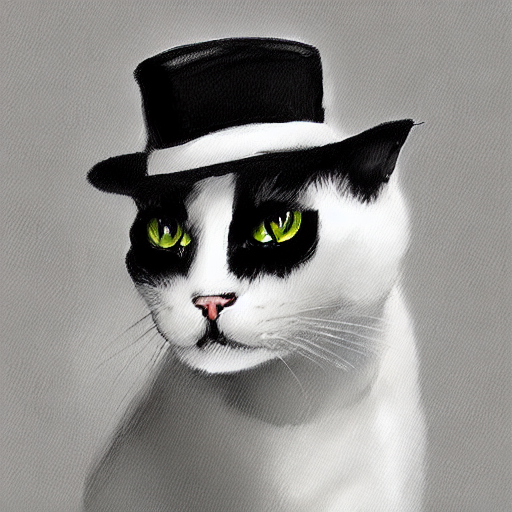

In [17]:
import torch
from diffusers import StableDiffusionPipeline

pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")

#pipeline.enable_sequential_cpu_offload()
generator = torch.Generator(device="cuda").manual_seed(30)

prompt = "Black white cat with a hat, digital art"

image = pipeline(prompt=prompt, generator=generator).images[0]

#image.save("result.png")

image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

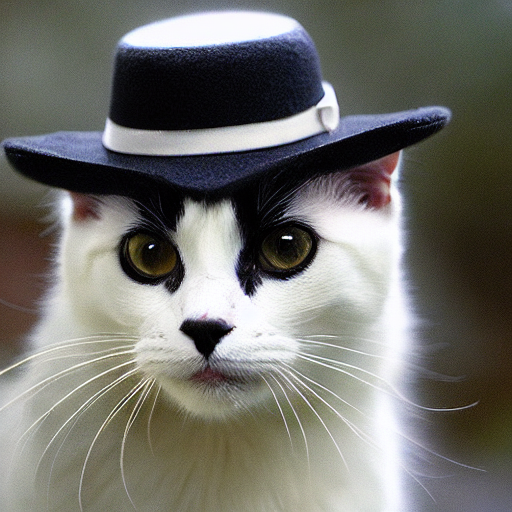

In [18]:
# Code with negative prompt and prompt weight

import torch
from diffusers import StableDiffusionPipeline
from compel import Compel

pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")

#pipeline.enable_sequential_cpu_offload()
generator = torch.Generator(device="cuda").manual_seed(30)

compel_proc = Compel(tokenizer=pipeline.tokenizer, text_encoder=pipeline.text_encoder)

prompt = "Black white cat with a hat, digital art"
negative_prompt = "ugly, distorted face, poor details, deformed, big nose, bad art, poorly drawn feet, poorly drawn face, watermark++, text++, signature++, missing arms, missing legs, lying down"

w_prompt = compel_proc(negative_prompt)
image = pipeline(prompt=prompt, negative_prompt_embeds=w_prompt, generator=generator, num_images_per_prompt=5).images[0]

#image.save("result.png")

image

In [19]:
import PIL
from PIL import Image

# Code for visualization of multiple images
def image_grid(imgs, rows, cols):
    """
    This function takes a list of images and creates a grid of images from them.

    Args:
    imgs (list): List of images to be used in the grid.
    rows (int): Number of rows in the grid.

    Returns:
    grid (Image): The grid of images.
    """

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

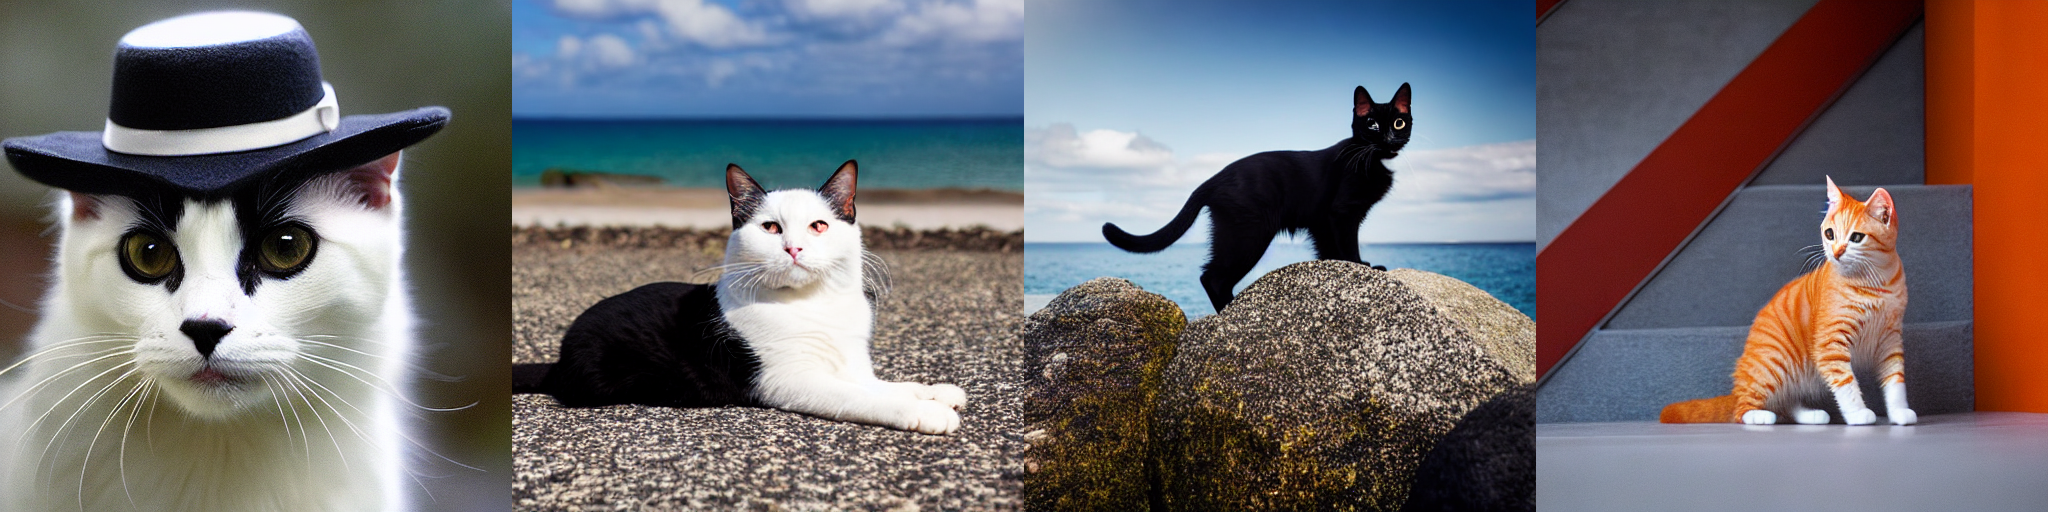

In [24]:
# Bu kodu birden fazla prompt ve negatif prompt istediğimizde kullanabiliriz. Ayrıca prompt weight için de Compel kütüphanesi kullanıldı.

import torch
from diffusers import StableDiffusionPipeline
from compel import Compel

pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")

#pipeline.enable_sequential_cpu_offload()
generator = torch.Generator(device="cuda").manual_seed(30)

compel_proc = Compel(tokenizer=pipeline.tokenizer, text_encoder=pipeline.text_encoder)

prompt = ["Black white cat with a hat, digital art", "A black and white cat++ lying down on a coast with sunny weather, realistic", "A black white cat++ and sea backgorund, realistic", "An orange cat blue-eyed, going up the stairs, modern art"]
negative_prompt = ["ugly, distorted face, poor details, deformed, big nose, bad art, poorly drawn feet, poorly drawn face, watermark++, text++, signature++, missing arms, missing legs, lying down",
                   "ugly, distorted face, poor details, deformed, big nose, bad art, poorly drawn feet, poorly drawn face, watermark++, text++, signature++, missing arms, missing legs",
                   "ugly, distorted face, poor details, deformed, big nose, bad art, poorly drawn feet, poorly drawn face, watermark++, text++, signature++, missing arms, missing legs, bad drawn eyes",
                   "ugly, distorted face, poor details, deformed, big nose, bad art, poorly drawn feet, poorly drawn face, watermark++, text++, signature++, missing arms, missing legs"]

w_prompt = compel_proc(negative_prompt)
images = pipeline(prompt=prompt, negative_prompt_embeds=w_prompt, generator=generator).images

grid = image_grid(images, 1, 4)

#grid.save("result.png")
grid

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

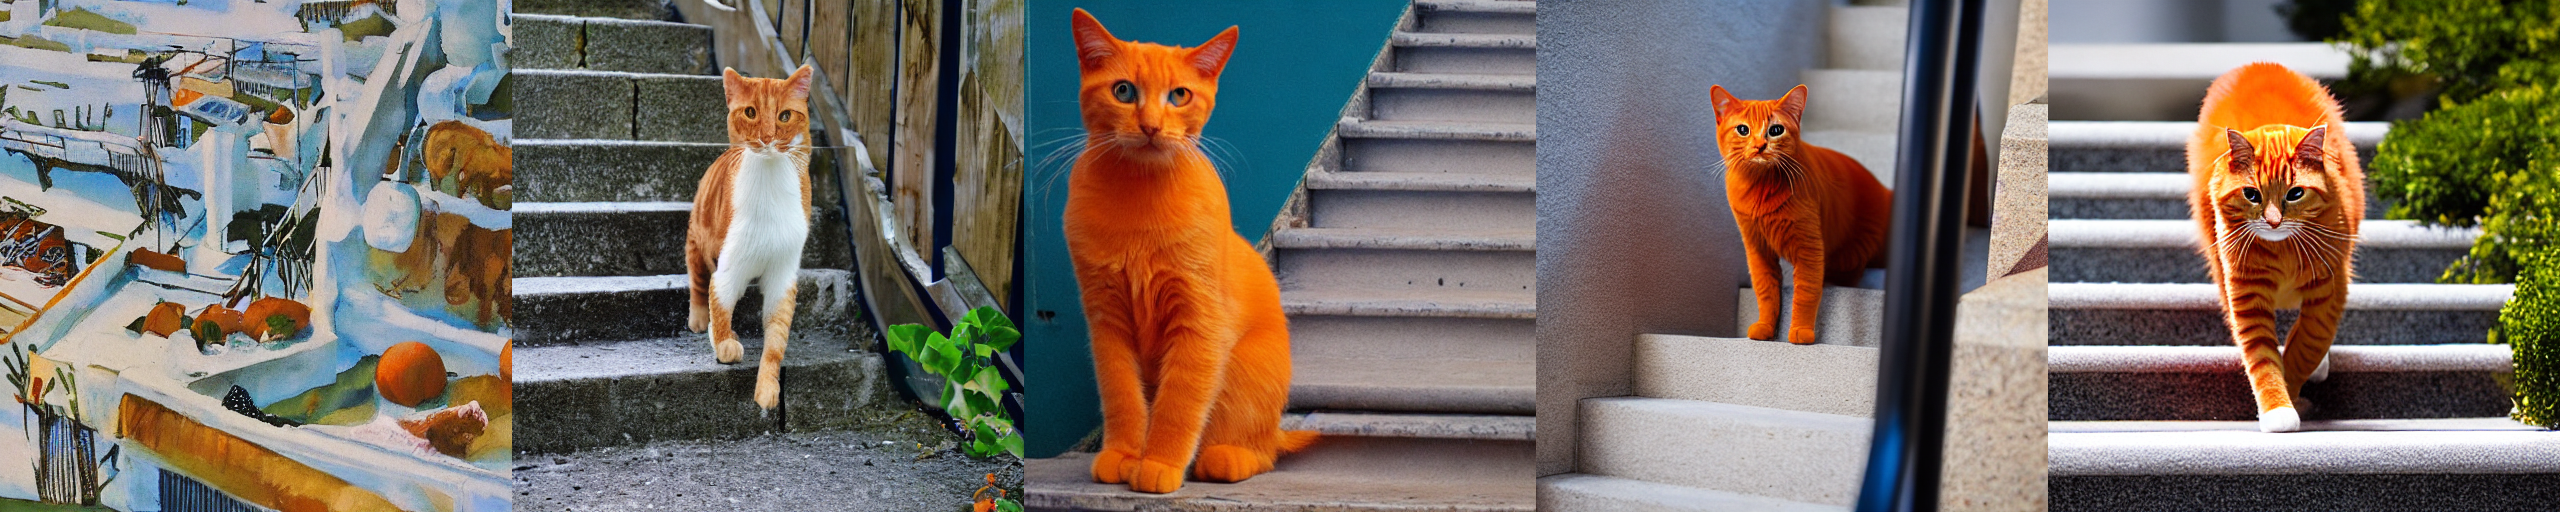

In [21]:
import torch
from diffusers import StableDiffusionPipeline

# Bu kodu farklı guidance_scale'ları denemek için kullanabilirsiniz.

def generate_images_with_different_guidance_scales(prompt, negative_prompt, guidance_scales, seed, device):

    pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to(device)

    generator = torch.Generator(device=device).manual_seed(seed)

    images = []
    for guidance_scale in guidance_scales:
        image = pipeline(prompt=prompt, negative_prompt=negative_prompt, guidance_scale=guidance_scale, generator=generator).images[0]
        images.append(image)

    grid = image_grid(images, 1, len(guidance_scales))

    return grid


prompt = "An orange cat blue-eyed, going up the stairs, modern art"
negative_prompt = "ugly, distorted face, poor details, deformed, bad art, poorly drawn feet, poorly drawn face, watermark, text, signature, missing arms, missing legs"
guidance_scales = [0.5, 2.5, 5, 7.5, 10.5]
seed = 30
device = "cuda"

grid = generate_images_with_different_guidance_scales(prompt, negative_prompt, guidance_scales, seed, device)
#grid.save("result.png")

grid